In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [46]:
df = pd.read_csv('Wholesale customers data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [47]:
labels = df['Region']
data = df.drop(columns=['Region'])
data

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,12669,9656,7561,214,2674,1338
1,2,7057,9810,9568,1762,3293,1776
2,2,6353,8808,7684,2405,3516,7844
3,1,13265,1196,4221,6404,507,1788
4,2,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...
435,1,29703,12051,16027,13135,182,2204
436,1,39228,1431,764,4510,93,2346
437,2,14531,15488,30243,437,14841,1867
438,1,10290,1981,2232,1038,168,2125


In [48]:
scaler = StandardScaler()
data = scaler.fit_transform(data)
data

array([[ 1.44865163,  0.05293319,  0.52356777, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163, -0.39130197,  0.54445767, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163, -0.44702926,  0.40853771, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.20032554,  1.31467078, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709, -0.13538389, -0.51753572, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709, -0.72930698, -0.5559243 , ..., -0.62009417,
        -0.50488752, -0.52286938]], shape=(440, 7))

In [49]:
data_centered = data - data.mean()
cov_matrix = np.cov(data_centered, rowvar=False)
eig_values, eig_vectors = np.linalg.eig(cov_matrix)
idx = np.argsort(eig_values)[::-1]
eig_vectors = eig_vectors[:, idx]

projected_data_2d = data_centered.dot(eig_vectors[:, :2])
projected_data_3d = data_centered.dot(eig_vectors[:, :3])

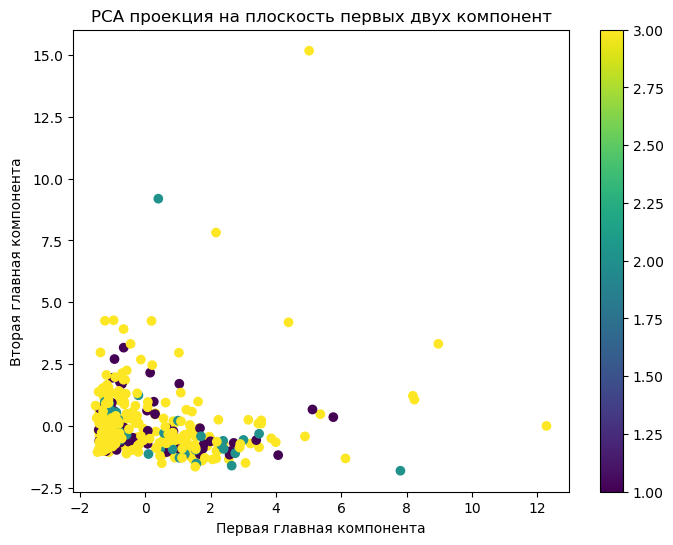

In [50]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(projected_data_2d[:, 0], projected_data_2d[:, 1], c=labels, cmap='viridis')
plt.colorbar(scatter)
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.title('PCA проекция на плоскость первых двух компонент')
plt.show()

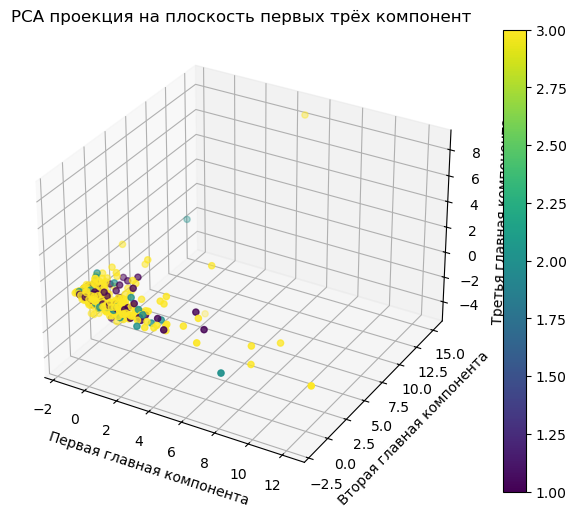

In [51]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(projected_data_3d[:, 0], projected_data_3d[:, 1], projected_data_3d[:, 2], c=labels, cmap='viridis')
fig.colorbar(scatter)
ax.set_xlabel('Первая главная компонента')
ax.set_ylabel('Вторая главная компонента')
ax.set_zlabel('Третья главная компонента')
ax.set_title('PCA проекция на плоскость первых трёх компонент')
plt.show()

In [52]:
from sklearn.decomposition import PCA

pca_2d = PCA(n_components=2)
data_2d = pca_2d.fit_transform(data)

pca_3d = PCA(n_components=3)
data_3d = pca_3d.fit_transform(data)

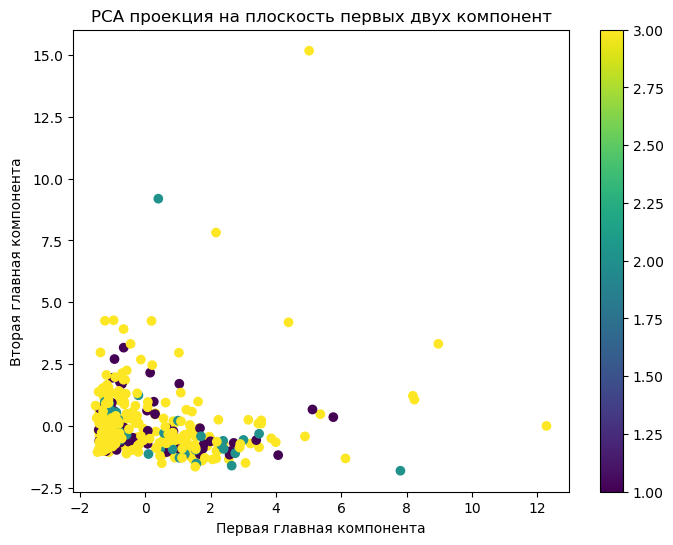

In [53]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='viridis')
plt.colorbar(scatter)
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.title('PCA проекция на плоскость первых двух компонент')
plt.show()

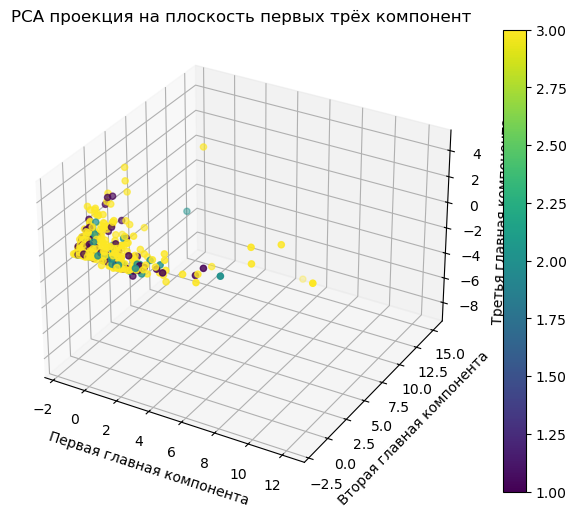

In [54]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data_3d[:, 0], data_3d[:, 1], data_3d[:, 2], c=labels, cmap='viridis')
fig.colorbar(scatter)
ax.set_xlabel('Первая главная компонента')
ax.set_ylabel('Вторая главная компонента')
ax.set_zlabel('Третья главная компонента')
ax.set_title('PCA проекция на плоскость первых трёх компонент')
plt.show()

In [55]:
total_var = np.sum(eig_values)

explained_var_ratio = np.cumsum(sorted(eig_values, reverse=True)) / total_var

loss_2d = 1 - explained_var_ratio[1]
loss_3d = 1 - explained_var_ratio[2]

print("Потери при 2D проекции:", loss_2d)
print("Потери при 3D проекции:", loss_3d)


Потери при 2D проекции: 0.3018245434576894
Потери при 3D проекции: 0.19608757587730807
